In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math
from sklearn.model_selection import TimeSeriesSplit
from sklearn.datasets import make_classification
import statistics as stats

# Load SLR Selector

In [38]:
def SLR_Selection(X, Y, penalty, maximum_feature, solver, max_iter):
    
    '''
    1. Define Logistic Regression model with L1/L2 penalised term for feature selection
    2. Fit training data into the defined Logistic Regression.
    3. Check the indexes for the selected features and print relevant estimation from it.
    4. Draw the coeffcient against the name of selected feature
    5. Calculate the resulting probability mapped from exact value for coefficient value/Plot it.
    '''
    
    #Define the logistic regression model
    lr_selector = SelectFromModel(LogisticRegression(C = 1, penalty = penalty, solver = solver , max_iter = max_iter),
                                 max_features = maximum_feature) # max_features can be used to select asigned number of features.
    lr_selector.fit(X, Y)
    
    lr_support = lr_selector.get_support() #Obtain the index list of True/False: If true, selected; if false, dropped.     
    #lr_index = lr_selector.get_support(indices = True) #Translate the index into the corresponding feature names (column index).
    #lr_feature = X.iloc[:, lr_support].columns.tolist() #Same as above (list with comma).
    #print(str(len(lr_index)), 'selected features')
    #print('Column index for selected features', lr_index) #print the column index, which can be directly used for modelling.
    lst = []
    for e in range(len(lr_support)):
        if lr_support[e] == True:
            lst.append(e)
            
    return lst

    
    '''
    #Fit the final selected data into SLR model and obtain estimations.
    #X_copy = pd.DataFrame(X.copy())
    LR_fit = LogisticRegression(C = 1, penalty = penalty, solver = solver, max_iter = max_iter)
    fit = LR_fit.fit(X.iloc[:, lr_index], Y)
    
   
    #Estimations
    LR_coef = LR_fit.coef_
    LR_intercept = LR_fit.intercept_
    print('Coefficient List of Selected Features', LR_coef)
    print('Intercept = ', LR_intercept)
    
    #Plot the estimated coefficient.
    X_copy = X.copy()
    dset = pd.DataFrame()
    dset['attr'] = X_copy.columns[lr_index]
    dset['Coefficient'] = LR_coef.T #Transform array by replacing column/row by row/column.
    dset = dset.sort_values(by = 'Coefficient', ascending=False)

    plt.figure(figsize = (9, 12))
    plt.yticks(fontsize = 11)
    plt.barh(y = dset['attr'], width = dset['Coefficient'], color = '#1976D2')
    #plt.title('Test ', fontsize=20, fontweight='bold', pad=20)
    plt.xlabel('Coefficient', fontsize = 14, labelpad = 20)
    plt.ylabel('Name of Important Features', fontsize = 14, labelpad = 20)
    plt.show()
    
    
    #Plot estimated probability
    prob = []
    for i in range(len(LR_coef.T)):
        prob_value = 1/(1 + math.exp(-LR_fit.intercept_ - LR_coef.T[i]))
        prob.append(prob_value)
        prob_arr = np.array(prob) #Must transform into array to plot against feature neame.

    dset['Prob'] = prob_arr
    dset = dset.sort_values(by = 'Coefficient', ascending = False)

    plt.figure(figsize = (9, 12))
    plt.yticks(fontsize = 11)
    plt.barh(y = dset['attr'], width=dset['Prob'], color='#1976D2')
    #plt.title('Test ', fontsize=20, fontweight='bold', pad=20)
    plt.xlabel('P(Y|factor)', fontsize = 14, labelpad = 20)
    plt.ylabel('Name of Important Features', fontsize = 14, labelpad=20)
    plt.show()
    '''

# Test out Amount of Features to Select

In [3]:
#Dataset
X, Y = make_classification(n_samples = 1000, n_features = 30, n_classes = 2, random_state = 1)
#print(X); print(Y)
X_df = pd.DataFrame(X); Y_df = pd.DataFrame(Y)

In [39]:
#Apply the SLR Selector
a = SLR_Selection(X = X_df, Y = Y_df, penalty = 'l1', maximum_feature = 8, solver = 'saga', max_iter = 10000)
print(a)

SLR_mod = LogisticRegression(C = 1, penalty = 'l1', solver = 'saga', max_iter = 10000)
cross_validation = cross_val_score(SLR_mod, X_df.iloc[:, a], Y_df, cv = tscv, scoring = 'roc_auc')

print(cross_validation)
print(cross_validation.mean())

[3, 5, 6, 9, 11, 15, 20, 26]
[0.92779807 0.91912141 0.91111111]
0.9193435300881072


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

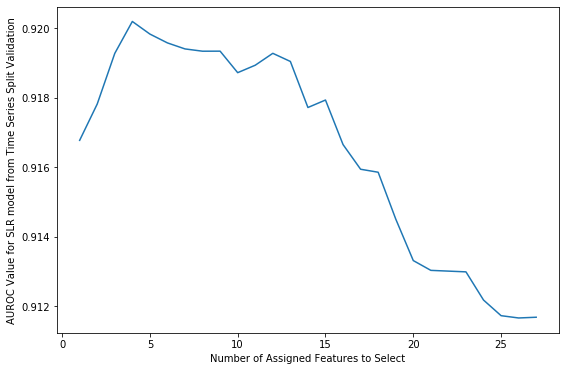

In [45]:
from sklearn.model_selection import cross_val_score
tscv = TimeSeriesSplit(n_splits = 3) #For time series data only.

lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
cv_lst = []
SLR_mod = LogisticRegression(C = 1, penalty = 'l1', solver = 'saga', max_iter = 10000)
metric_lst = []

for range_number in lst:
    selected_features = SLR_Selection(X = X_df, Y = Y_df, penalty = 'l1', maximum_feature = range_number,
                                      solver = 'saga', max_iter = 10000)
    
    metric_lst.append(selected_features)
    #print(metric_lst)

cv_lst2 = [] 
for i in range(len(metric_lst)):
    cv = cross_val_score(SLR_mod, X_df.iloc[:, metric_lst[i]], 
                         Y_df, cv = tscv, scoring = 'roc_auc')
    #print('H = ', type(cv[0]))
    cv2 = cv.tolist()
    cv_lst2.append(stats.mean(cv2)) #Take mean on cross validation value over each split.
    #return cross_validation
    #cv_lst2.mean()

        
plt.figure(figsize = (9, 6))
plt.plot(lst, cv_lst2)
plt.xlabel('Number of Assigned Features to Select')
plt.ylabel('AUROC Value for SLR model from Time Series Split Validation')
plt.show()


In [22]:
print(metric_lst)

[[9]]


In [29]:
cross_validation = cross_val_score(SLR_mod, X_df.iloc[:, 7], Y_df, cv = tscv, scoring = 'roc_auc')
print(cross_validation)

[nan nan nan]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[ 0.37820695  0.17739055  1.87087964  0.99852569  1.23948329  0.56918159
 -0.14893672 -0.120735    1.20265407  1.56574023 -1.50212012 -0.47594572
 -1.55072509 -0.03436699 -0.59349522 -0.84433157  0.89058632 -0.48784193
 -0.26830042 -0.67906985  0.59702522  1.06156712 -0.19390615  1.47681361
 -0.86431833 -0.64410745 -0.92281919  0.62521404 -0.66880284 -1.09632506
  1.34252729  0.05698624  0.38102096 -0.50652206  1.16765233  0.19586979
 -1.00581072  0.30737208 -0.54069046 -0.31981031 -2.28811534 -1.97813967
  0.81163267  0.2495262   1.1606205   0.88952187 -0.48758018 -0.14409302
  0.93731728 -0.54045738  2.1426371  -0.644723   -0.86171592 -1.20586691
 -1.24356201 -1.62626057 -0.17505449  0.86167039  0.62059316 -0.1073